<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/06-1-Reduccion-Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Reducción de Dimensionalidad
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado como una guía introductoria para la reducción de dimensionalidad en aprendizaje automático. El objetivo es entender por qué y cómo reducir el número de variables que describen nuestros datos, manteniendo la mayor cantidad posible de información relevante.

Nos centraremos en:

- La **motivación** para reducir la dimensionalidad (visualización, ruido, costo computacional).
- La idea general de la **proyección** de datos a espacios de menor dimensión.
- El método de **Análisis de Componentes Principales (PCA)** como ejemplo clásico.

Al final, serás capaz de:

- Aplicar PCA a un conjunto de datos sencillo.
- Interpretar la varianza explicada por cada componente.
- Visualizar datos de alta dimensión en 2D utilizando componentes principales.

Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset de ejemplo
from sklearn import datasets

# Estandarización y PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Cargar el conjunto de datos Iris </font>

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
df = pd.concat([X, y], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Podemos visualizar algunas relaciones entre las variables originales.

c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-p

<Figure size 600x400 with 0 Axes>

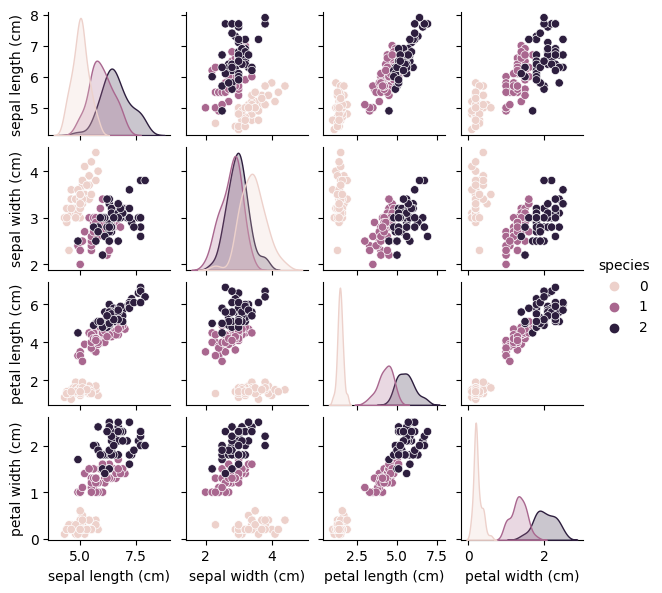

In [3]:
# Visualización de pares de variables originales
plt.figure(figsize=(6, 4))
sns.pairplot(df,vars=iris.feature_names,hue='species', height=1.5)
plt.show()

---
## <font color='264CC7'> Estandarización de los datos </font>

PCA es sensible a la **escala** de las variables. Por ejemplo, una variable medida en centímetros puede tener una variabilidad numéricamente mayor que otra medida en milímetros.

Por ello, antes de aplicar PCA es común **estandarizar** las variables.

In [4]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
## <font color='264CC7'> PCA: Componentes principales </font>

La idea de PCA es encontrar nuevas variables (llamadas **componentes principales**) que sean:

- Combinaciones lineales de las variables originales.
- No correlacionadas entre sí.
- Ordenadas según la cantidad de **varianza explicada**:
  - El primer componente explica la mayor parte de la varianza posible.
  - El segundo explica la mayor parte de la varianza restante, y así sucesivamente.

Aplicaremos PCA para obtener los primeros 4 componentes principales.

In [11]:
# Varianza explicada por cada componente principal
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:\n", explained_variance)

Varianza explicada por cada componente principal:
 [0.72962445 0.22850762 0.03668922 0.00517871]


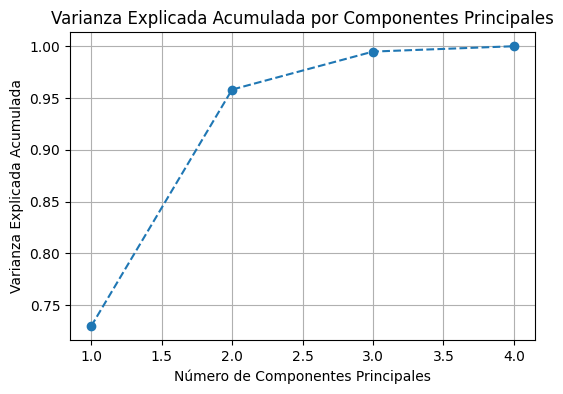

In [12]:
# Grafico de la varianza explicada acumulada
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

Tomamos dos componentes principales para poder visualizar los datos en 2D.

In [13]:
# PCA con 2 componentes para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
display(pd.DataFrame(X_pca, columns=['PC1', 'PC2']).head())

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


---
## <font color='264CC7'> Visualización en el espacio de componentes principales </font>

Ahora podemos visualizar los datos en el plano formado por los dos primeros componentes principales. Esto nos permite ver la estructura de los datos en 2D, intentando preservar la mayor cantidad posible de información.


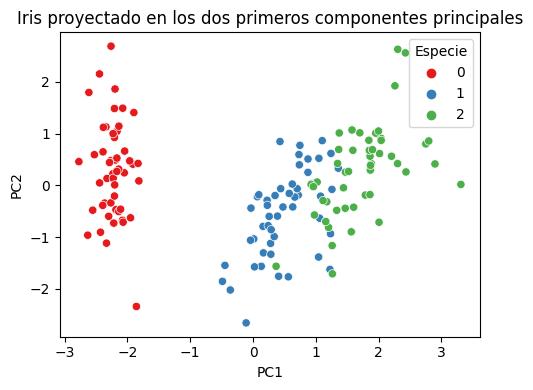

In [8]:
# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']

# Gráfico de dispersión de los dos primeros componentes
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='Set1')
plt.title('Iris proyectado en los dos primeros componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Especie')
plt.tight_layout()

## <font color='264CC7'> Interpretación de los componentes </font>

Cada componente principal es una combinación lineal de las variables originales. Las **cargas** ("loadings") nos indican cuánto aporta cada variable original a cada componente.

A continuación mostramos una tabla con las cargas de los dos primeros componentes.

In [9]:
# Cargas de los componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=iris.feature_names
)

loadings

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


Podemos visualizar las cargas para interpretar mejor qué representa cada componente.

<Figure size 600x400 with 0 Axes>

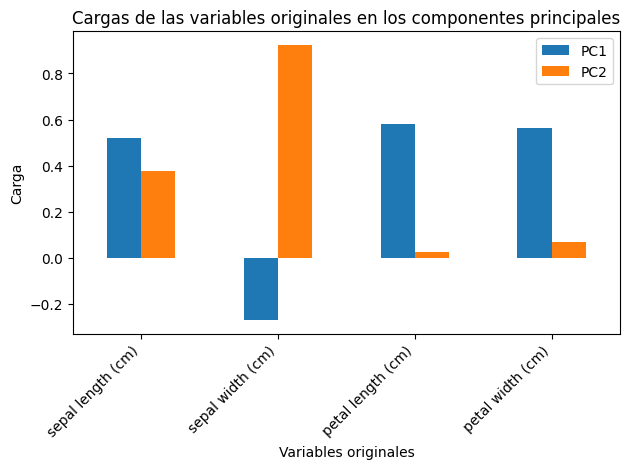

In [10]:
# Visualización de las cargas de los componentes
plt.figure(figsize=(6, 4))
loadings.plot(kind='bar')
plt.title('Cargas de las variables originales en los componentes principales')
plt.xlabel('Variables originales')
plt.ylabel('Carga')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

---

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Analiza la tabla y el gráfico de cargas. ¿Qué variables parecen contribuir más al primer componente principal? ¿Cuánto cambia si usamos 3 componentes?
</div>

---